# import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/penyisihan-dsc-mcf-itb-2022/Data_Train.csv
/kaggle/input/penyisihan-dsc-mcf-itb-2022/Data_Test.csv
/kaggle/input/penyisihan-dsc-mcf-itb-2022/Sample_Submission (1).csv
/kaggle/input/penyisihan-dsc-mcf-itb-2022/Data Sosial dan Kependudukan per Provinsi.csv


In [2]:
# directory file for prediction 
train_dir = "/kaggle/input/penyisihan-dsc-mcf-itb-2022/Data_Train.csv"
test_dir = "/kaggle/input/penyisihan-dsc-mcf-itb-2022/Data_Test.csv"

In [3]:
# read data file using pandas
train = pd.read_csv(train_dir)
test = pd.read_csv(test_dir)

# to see how much rows and columns in dataset
print(train.shape) 
print(test.shape)

(407, 26)
(106, 24)


In [4]:
#checking training data
train

,Id,Kabupaten/Kota,Harapan Lama Sekolah (2019),Harapan Lama Sekolah (2020),Harapan Lama Sekolah (2021),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021),Rata-rata Lama Sekolah (2019),Rata-rata Lama Sekolah (2020),...,Indeks Pembangunan Manusia (2021),Peringkat Indeks Pembangunan Manusia (2019),Peringkat Indeks Pembangunan Manusia (2020),Peringkat Indeks Pembangunan Manusia (2021),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)
0,1,Buton Tengah,12.70,13.00,13.12,7264,7221,7244,7.29,7.30,...,64.55,-,-,-,0.34,0.38,0.38,1.64,1.91,2.14
1,2,Kuantan Singingi,13.32,13.33,13.34,10820,10243,10309,8.58,8.59,...,70.60,-,-,-,0.32,0.32,0.23,1.28,1.44,1.14
2,3,Lombok Utara,12.71,12.72,12.76,9279,9006,9057,5.84,5.91,...,64.77,-,-,-,2.42,2.58,1.66,7.39,7.09,5.69
3,5,Buol,13.08,13.09,13.10,8151,7942,7974,8.75,8.86,...,68.25,-,-,-,0.78,0.47,0.51,2.89,1.97,2.01
4,8,Kota Tebing Tinggi,12.71,12.72,12.73,12895,12876,12939,10.28,10.31,...,75.42,-,-,-,0.31,0.56,0.28,1.47,1.74,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,505,Banggai,13.23,13.24,13.25,9842,9554,9603,8.24,8.52,...,70.60,-,-,-,0.26,0.21,0.23,1.15,1.05,1.09
403,507,Tanah Laut,11.96,12.01,12.31,11318,11207,11310,7.64,7.88,...,69.87,-,-,-,0.11,0.12,0.14,0.58,0.58,0.68
404,508,Mahakam Ulu,12.50,12.51,12.61,8008,7524,7802,7.89,7.97,...,67.95,-,-,-,0.55,0.29,0.37,1.94,1.46,1.77
405,510,Nias Selatan,12.22,12.23,12.27,7105,6974,7041,5.53,5.85,...,62.35,-,-,-,0.50,0.76,0.52,2.28,2.82,2.38


In [5]:
# to see the statistical description from training data
train.describe()

,Id,Harapan Lama Sekolah (2019),Harapan Lama Sekolah (2020),Harapan Lama Sekolah (2021),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021),Rata-rata Lama Sekolah (2019),Rata-rata Lama Sekolah (2020),Rata-rata Lama Sekolah (2021),...,Umur Harapan Hidup Saat Lahir (UHH) (2021),Indeks Pembangunan Manusia (2019),Indeks Pembangunan Manusia (2020),Indeks Pembangunan Manusia (2021),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,...,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,254.542998,12.835651,12.900295,12.963661,10350.257985,10165.857494,10232.029484,8.186511,8.310418,8.405946,...,69.535799,69.285553,69.384521,69.680541,0.587224,0.561106,0.585749,2.112727,2.061499,2.121278
std,148.888236,1.363455,1.350578,1.338904,2665.411454,2649.712849,2671.995442,1.663764,1.650030,1.647457,...,3.432372,6.621864,6.593220,6.571755,0.888473,0.817328,0.863150,2.141924,2.050201,2.002196
min,1.000000,3.290000,3.610000,3.870000,4181.000000,3975.000000,3976.000000,0.970000,1.130000,1.420000,...,55.430000,30.750000,31.550000,32.840000,0.020000,0.000000,0.030000,0.160000,0.070000,0.190000
25%,122.500000,12.285000,12.350000,12.410000,8598.500000,8456.000000,8539.500000,7.285000,7.435000,7.510000,...,67.255000,66.170000,66.210000,66.475000,0.170000,0.180000,0.200000,0.840000,0.875000,0.940000
50%,256.000000,12.810000,12.850000,12.910000,10298.000000,10121.000000,10198.000000,8.100000,8.240000,8.300000,...,69.780000,69.040000,69.180000,69.530000,0.340000,0.330000,0.360000,1.520000,1.470000,1.590000
75%,384.500000,13.455000,13.490000,13.595000,11763.000000,11549.000000,11671.000000,9.110000,9.270000,9.335000,...,71.745000,72.535000,72.660000,72.955000,0.610000,0.600000,0.635000,2.535000,2.345000,2.520000
max,511.000000,17.390000,17.790000,17.800000,23851.000000,23575.000000,23888.000000,12.640000,12.650000,12.830000,...,77.730000,85.070000,85.410000,85.710000,8.680000,6.990000,8.120000,16.350000,13.870000,14.870000


# data cleaning

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 26 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Id                                                               407 non-null    int64  
 1   Kabupaten/Kota                                                   407 non-null    object 
 2   Harapan Lama Sekolah (2019)                                      407 non-null    float64
 3   Harapan Lama Sekolah (2020)                                      407 non-null    float64
 4   Harapan Lama Sekolah (2021)                                      407 non-null    float64
 5   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)     407 non-null    int64  
 6   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)    407 non-null    int64  
 7   Pengeluaran per Kapita Disesuaikan (Ribu Rup

In [7]:
#object data in independent var
pipm = ['Peringkat Indeks Pembangunan Manusia (2019)',
      'Peringkat Indeks Pembangunan Manusia (2020)',
      'Peringkat Indeks Pembangunan Manusia (2021)']
train[pipm].describe()

,Peringkat Indeks Pembangunan Manusia (2019),Peringkat Indeks Pembangunan Manusia (2020),Peringkat Indeks Pembangunan Manusia (2021)
count,407,407,407
unique,11,11,11
top,-,-,-
freq,397,397,397


'Peringkat Indeks Pembangunan Manusia' columns will be dropped in train and test data since it contains 397 unknown value/- and it it is related to 'Indeks Pembangunan Manusia'

In [8]:
train = train.drop(columns=pipm)
test = test.drop(columns = pipm)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 23 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Id                                                               407 non-null    int64  
 1   Kabupaten/Kota                                                   407 non-null    object 
 2   Harapan Lama Sekolah (2019)                                      407 non-null    float64
 3   Harapan Lama Sekolah (2020)                                      407 non-null    float64
 4   Harapan Lama Sekolah (2021)                                      407 non-null    float64
 5   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)     407 non-null    int64  
 6   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)    407 non-null    int64  
 7   Pengeluaran per Kapita Disesuaikan (Ribu Rup

# Exploratory Data Analysis

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


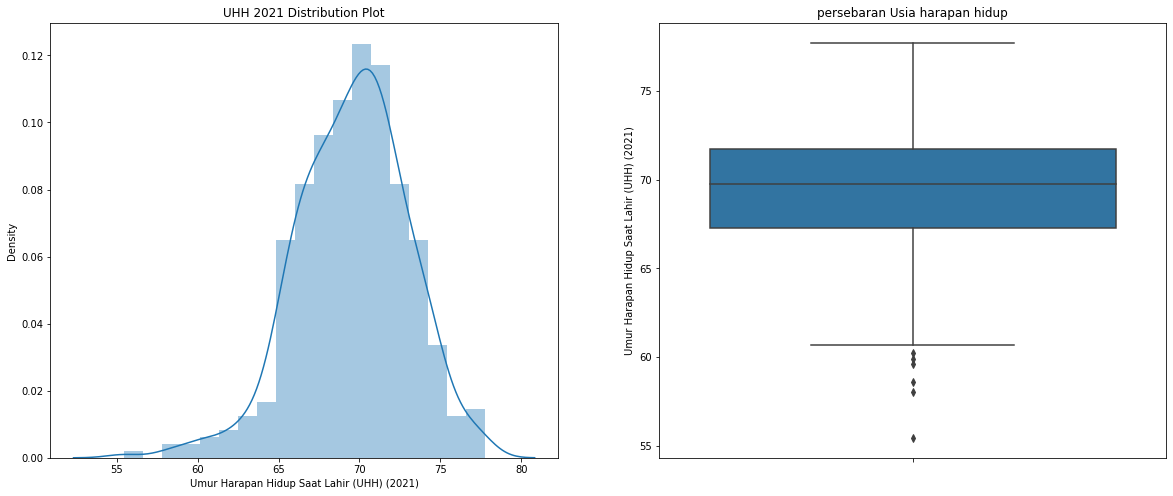

In [10]:
# UHH distribution
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
uhh21 = 'Umur Harapan Hidup Saat Lahir (UHH) (2021)'
plt.title('UHH 2021 Distribution Plot')
sns.distplot(train[uhh21])

plt.subplot(1,2,2)
plt.title('persebaran Usia harapan hidup')
sns.boxplot(y=train[uhh21])

plt.show()

In [11]:
train[uhh21].describe()

count    407.000000
mean      69.535799
std        3.432372
min       55.430000
25%       67.255000
50%       69.780000
75%       71.745000
max       77.730000
Name: Umur Harapan Hidup Saat Lahir (UHH) (2021), dtype: float64

## inference
from the visualization above 
1. the UHH2021 seemed distributed well. the mean and median relatively close. mean and distribution of the data point not spread out so far, so the variance is not really high

## Visualization of Independent Data

In [12]:
train.columns

Index(['Id', 'Kabupaten/Kota', 'Harapan Lama Sekolah (2019)',
       'Harapan Lama Sekolah (2020)', 'Harapan Lama Sekolah (2021)',
       'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)',
       'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)',
       'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)',
       'Rata-rata Lama Sekolah (2019)', 'Rata-rata Lama Sekolah (2020)',
       'Rata-rata Lama Sekolah (2021)',
       'Umur Harapan Hidup Saat Lahir (UHH) (2019)',
       'Umur Harapan Hidup Saat Lahir (UHH) (2020)',
       'Umur Harapan Hidup Saat Lahir (UHH) (2021)',
       'Indeks Pembangunan Manusia (2019)',
       'Indeks Pembangunan Manusia (2020)',
       'Indeks Pembangunan Manusia (2021)',
       'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019) ',
       'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020) ',
       'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021) ',
       'Indeks Kedalaman Kem

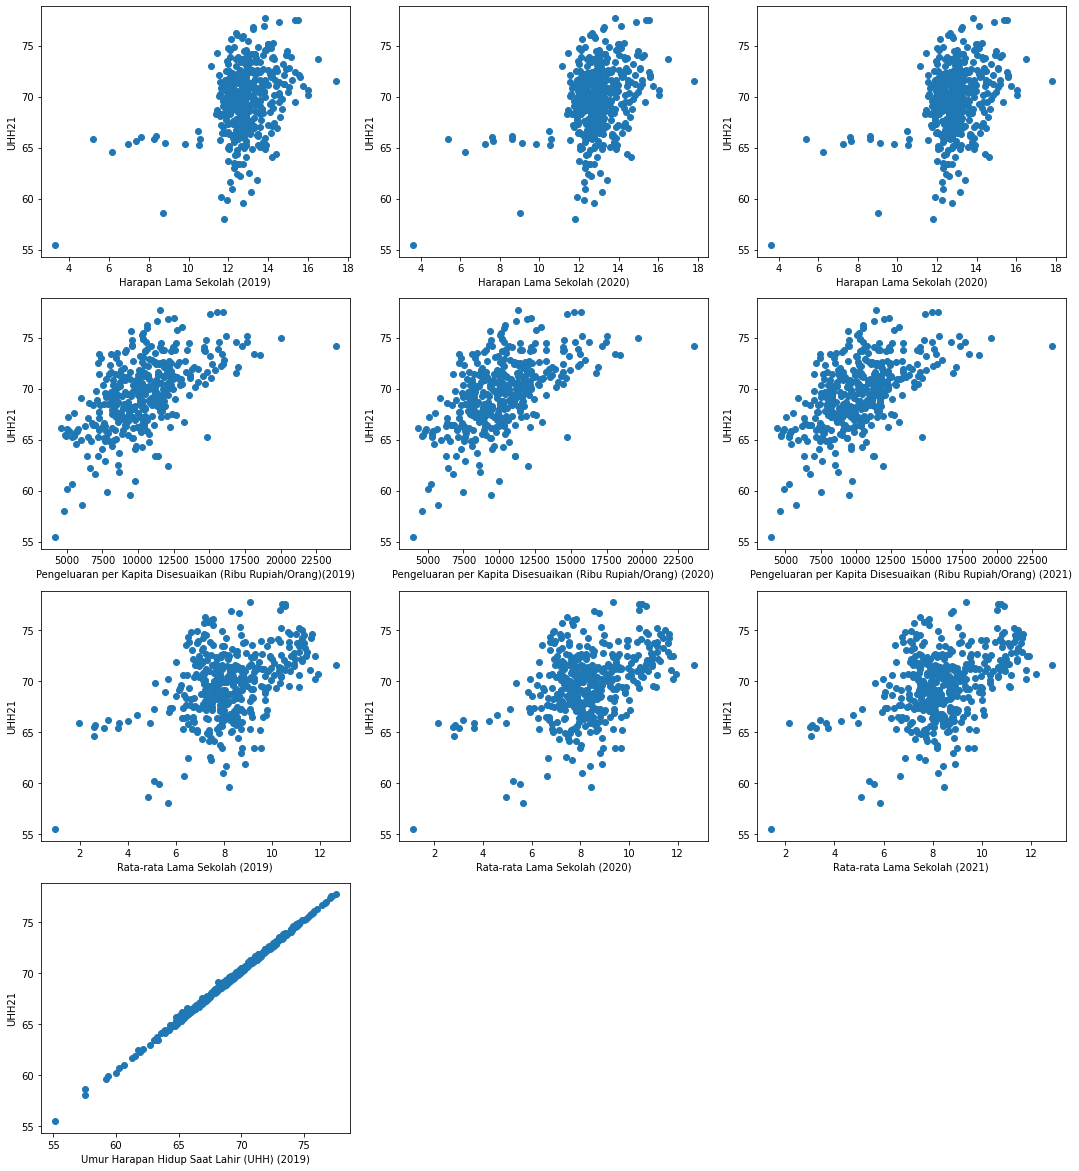

In [13]:
def scatter(x,fig):
    plt.subplot(5, 3,fig)
    plt.scatter(train[x],train[uhh21])
    #plt.title(x)
    plt.ylabel('UHH21')
    plt.xlabel(x)

plt.figure(figsize=(15,20))

scatter('Harapan Lama Sekolah (2019)', 1)
scatter('Harapan Lama Sekolah (2020)', 2)
scatter('Harapan Lama Sekolah (2020)', 3)
scatter('Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)', 4)
scatter('Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)', 5)
scatter('Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)', 6)
scatter('Rata-rata Lama Sekolah (2019)', 7)
scatter('Rata-rata Lama Sekolah (2020)', 8)
scatter('Rata-rata Lama Sekolah (2021)', 9)
scatter('Umur Harapan Hidup Saat Lahir (UHH) (2019)', 10)

plt.tight_layout()

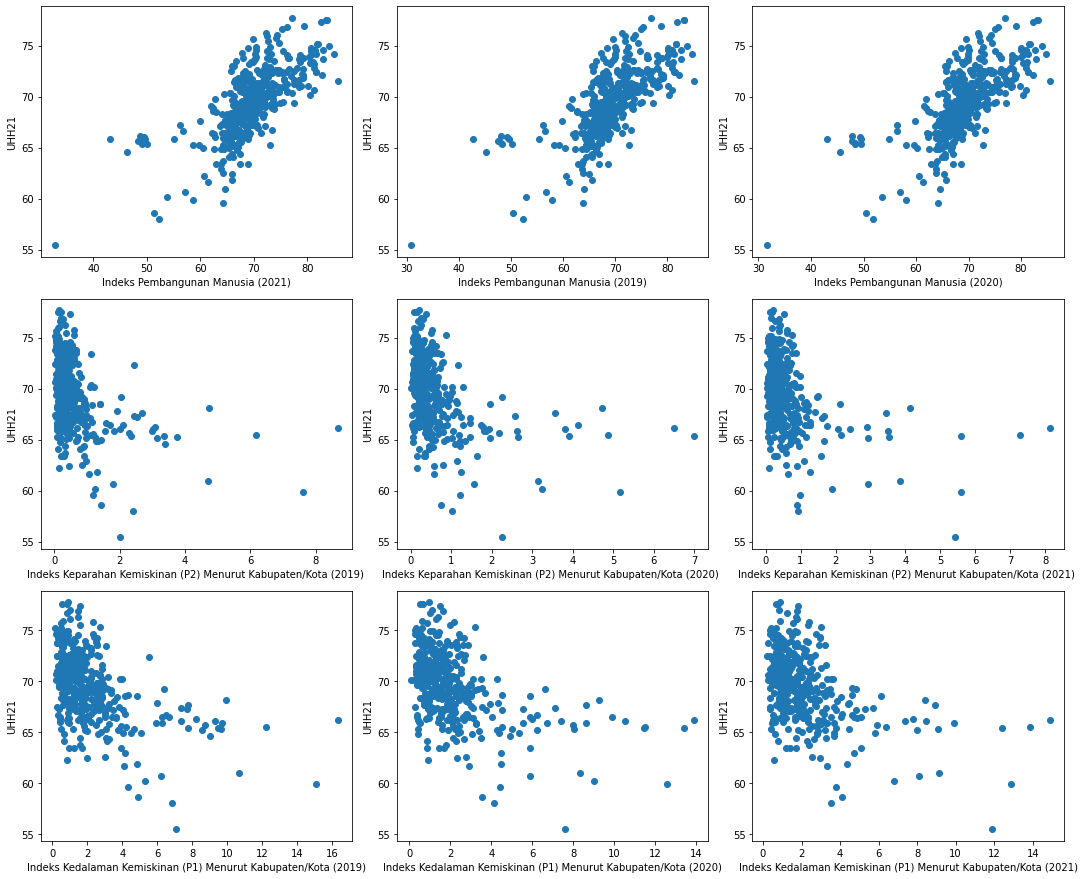

In [14]:
plt.figure(figsize=(15,20))
#scatter('Umur Harapan Hidup Saat Lahir (UHH) (2019)', 1)
#scatter('Umur Harapan Hidup Saat Lahir (UHH) (2020)',2)
scatter('Indeks Pembangunan Manusia (2021)', 1)
scatter('Indeks Pembangunan Manusia (2019)', 2)
scatter('Indeks Pembangunan Manusia (2020)', 3)
scatter('Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019) ',4)
scatter('Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020) ',5)
scatter('Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021) ',6)
scatter('Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019)', 7)   
scatter('Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020)', 8)
scatter('Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)', 9)



plt.tight_layout()

### Inferences :
* Data pada tahun 2019, 2020, dan 2021 tidak memiliki perbedaan yang signifikan.
* Harapan lama sekolah berkorelasi positif dengan UHH 2021 namun tidak sangat berpengaruh terhadap UHH 2021.
* Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) berkorelasi positif dengan UHH 2021 dan berpengaruh cukup besar terhadap UHH 2021.
* Rata-rata lama sekolah berkorelasi positif dengan UHH 2021 dan berpengaruh cukup besar terhadap UHH 2021.
* UHH 2019 dan 2020 berkorelasi positif dengan UHH 2021 dan sangat berpengaruh terhadap UHH 2021.
* Indeks pembangunan manusia berkorelasi positif dengan UHH 2021 dan berpengaruh besar terhadap UHH 2021.
* Indeks keparahan kemiskinan berkorelasi negative dengan UHH 2021 dan cukup berpengaruh terhadap UHH 2021
* Indeks kedalaman kemiskinan berkorelasi negative dengan UHH 2021 dan cukup berpengaruh terhadap UHH 2021

# Machine learning model

In [15]:
#define dependent variables (X), dependent variable (y) and test data
X = train.drop(columns = ['Id', 'Kabupaten/Kota',
                          'Umur Harapan Hidup Saat Lahir (UHH) (2021)'])
y = train['Umur Harapan Hidup Saat Lahir (UHH) (2021)']
test = test.drop(columns = ['Id'])

In [16]:
# checking the shape of the data before modeling
print(X.shape)
print(y.shape)

(407, 20)
(407,)


In [17]:
#split data to train data and validation data with 80% train data
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Model selection
### 1. Linear regresion

In [18]:
linreg = LinearRegression()

# Train the model using the training sets 
linreg.fit(X_train, y_train)

# Value of y intercept
linreg.intercept_
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X.columns,linreg.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,Harapan Lama Sekolah (2019),-0.054733
1,Harapan Lama Sekolah (2020),0.555972
2,Harapan Lama Sekolah (2021),-0.494616
3,Pengeluaran per Kapita Disesuaikan (Ribu Rupia...,0.000028
4,Pengeluaran per Kapita Disesuaikan (Ribu Rupia...,0.000379
5,Pengeluaran per Kapita Disesuaikan (Ribu Rupia...,-0.000402
6,Rata-rata Lama Sekolah (2019),0.019434
7,Rata-rata Lama Sekolah (2020),0.623192
8,Rata-rata Lama Sekolah (2021),-0.647863
9,Umur Harapan Hidup Saat Lahir (UHH) (2019),-0.401355


In [19]:
y_pred = linreg.predict(X_train)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
y_pred = linreg.predict(X_valid)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

RMSE: 0.04428379396416635
RMSE: 0.05204075512180414


### Random Forest Regressor

In [20]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
y_pred = reg.predict(X_valid)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

RMSE: 0.1268154769734369
RMSE: 0.1220292193118266


### XGBoost Regressor

In [28]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

eval_set = [(X_valid, y_valid)]
reg.fit(X_train, y_train, eval_metric="rmse", eval_set=eval_set, verbose=False)

y_pred = reg.predict(X_train)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
y_pred = reg.predict(X_valid)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

RMSE: 0.001059431453897327
RMSE: 0.21826351665343097


### SVM

In [22]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

# Train the model using the training sets 
reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
y_pred = reg.predict(X_valid)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

RMSE: 2.848028997511469
RMSE: 2.620156689526038


## Polynomial Regression

In [23]:
nb_degree = 2 #max degree
polynomial_features = PolynomialFeatures(degree = nb_degree)
X_TRANSF = polynomial_features.fit_transform(X_train)
model = LinearRegression()
model.fit(X_TRANSF, y_train)

Y_NEW = model.predict(X_TRANSF)

rmse = np.sqrt(metrics.mean_squared_error(y_train,Y_NEW)) 
rmse #train data

0.006712362167413062

In [24]:
#Validation data
X_TRANSF = polynomial_features.fit_transform(X_valid)
y_pred = model.predict(X_TRANSF)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

RMSE: 0.036785657258705945


## Inference
Based on 4 models above, the polynomial regression model gives the smallest rmse

In [25]:
test.head()

,Harapan Lama Sekolah (2019),Harapan Lama Sekolah (2020),Harapan Lama Sekolah (2021),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021),Rata-rata Lama Sekolah (2019),Rata-rata Lama Sekolah (2020),Rata-rata Lama Sekolah (2021),Umur Harapan Hidup Saat Lahir (UHH) (2019),Umur Harapan Hidup Saat Lahir (UHH) (2020),Indeks Pembangunan Manusia (2019),Indeks Pembangunan Manusia (2020),Indeks Pembangunan Manusia (2021),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)
0,12.33,12.39,12.65,7913,7801,7758,6.82,7.03,7.04,70.90,71.04,65.50,65.74,66.03,0.17,0.05,0.11,0.80,0.41,0.52
1,12.08,12.37,12.38,8760,8739,8790,4.55,4.85,4.86,67.96,68.03,61.94,62.70,62.80,0.70,0.53,0.80,3.20,2.93,3.66
2,15.41,15.51,15.75,16666,16593,16663,10.17,10.18,10.41,73.15,73.27,81.32,81.45,82.04,0.13,0.15,0.22,0.55,0.66,0.87
3,15.00,15.01,15.02,15176,14763,14937,11.55,11.56,11.57,70.38,70.45,80.16,79.94,80.11,0.76,0.55,0.79,2.27,1.98,2.53
4,11.76,11.81,12.10,13070,12909,12945,7.13,7.19,7.20,71.16,71.36,70.33,70.45,70.89,0.10,0.14,0.11,0.52,0.72,0.63


In [26]:
#predict test data using polynomial regression model
X_TRANSF = polynomial_features.fit_transform(test)
result = model.predict(X_TRANSF)
id_res = pd.read_csv('../input/penyisihan-dsc-mcf-itb-2022/Data_Test.csv')

#creating dataframe for the submission file
dfresult = pd.DataFrame(id_res['Id'])
dfresult['Umur Harapan Hidup Saat Lahir (UHH) (2021)'] = result
dfresult.to_csv('submission.csv', index=False)
dfresult

,Id,Umur Harapan Hidup Saat Lahir (UHH) (2021)
0,0,71.195351
1,4,68.041536
2,6,73.364754
3,7,70.487340
4,14,71.530337
...,...,...
101,501,76.274686
102,503,68.195189
103,506,73.844650
104,509,73.637730
